In [95]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import display, HTML, Image
import random 

In [96]:
def node_1(state):
    state["graph_state"] = state["graph_state"] + " hello"
    return state

def node_2(state):
   state["graph_state"] = state["graph_state"] + " howdy"
   return state

def node_3(state):
    state["graph_state"] = state["graph_state"] + " cool"
    return state

def decide_next(state):
    if random.random() > 0.5:
        return "node_2"
    else:
        return "node_3"

In [97]:
class State(TypedDict):
    graph_state: str

In [98]:
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

In [99]:
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_next)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

In [100]:
graph = builder.compile()

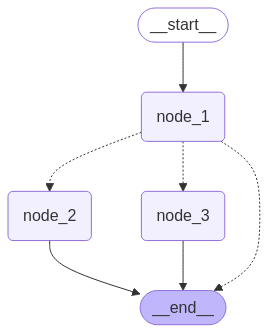

In [103]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [102]:
graph.invoke({"graph_state": "Hi"})

{'graph_state': 'Hi hello howdy'}